In [73]:
import os
import pandas as pd

#df1 will read Trip Data from August 2018 till January 2020
#df2 will pull trip data from February 2020 till January 2021
#df3 will pull Louisville weather data from August 2018 - January 2021
df1 = pd.read_csv(r'C:\Users\abhir\OneDrive\Documents\DS\DS Career Track docs\Free Data Sets\City of Louisville - escooter data\Data Files\DocklessTripOpenData_10.csv', parse_dates = ['StartDate'])
df2 = pd.read_csv(r'C:\Users\abhir\OneDrive\Documents\DS\DS Career Track docs\Free Data Sets\City of Louisville - escooter data\Data Files\fuzzed-trips.csv', parse_dates = ['StartDate'])
df3 = pd.read_excel(r'C:\Users\abhir\OneDrive\Documents\DS\DS Career Track docs\Free Data Sets\City of Louisville - escooter data\City_of_Louisville_ Weather_data.xlsx', parse_dates = ['Day'])

print(df1.head())


                             TripID  StartDate StartTime     EndDate EndTime  \
0  0000045c-2677-3a7d-4b73-cad99a57 2019-06-26     19:30   6/26/2019   19:30   
1  0000487b-92e6-50d6-7569-42ed3818 2019-09-22     14:30   9/22/2019   14:30   
2  00006088-2579-e0d0-6a30-a15bb878 2019-08-21     17:30   8/21/2019   17:30   
3  00008c1a-899b-8596-970f-9f6bf495 2019-07-03     11:00    7/3/2019   11:15   
4  00009301-3225-2aea-a84a-165a480a 2019-11-22     10:45  11/22/2019   11:00   

   TripDuration  TripDistance  StartLatitude  StartLongitude  EndLatitude  \
0             3         0.000         38.253         -85.756       38.253   
1             5         0.000         38.203         -85.752       38.204   
2             6         0.330         38.259         -85.733       38.265   
3             6         0.640         38.217         -85.757       38.221   
4             7         0.599         38.215         -85.759       38.222   

   EndLongitude  DayOfWeek  HourNum  
0       -85.755   

In [74]:
print(df3.head()) #ºF

         Day  High   Low Precip.  Snow  Unnamed: 5  Unnamed: 6
0        NaT    ºF    ºF    inch  inch         NaN         NaN
1 2018-08-01    82    70    0.94     0         NaN         NaN
2 2018-08-02    84    70       0     0         NaN         NaN
3 2018-08-03  89.1  69.1       0     0         NaN         NaN
4 2018-08-04    91    72       0     0         NaN         NaN


In [75]:
#df3.drop(['Unnamed: 5', 'Unnamed: 6'], axis = 1, inplace=True)
df3.drop(0, axis = 0, inplace=True)
df3.rename(columns={'Day':'Date','High':'HighºF', 'Low':'LowºF', 'Precip.':'Precip.(inch)', 'Snow':'Snow(inch)'}, inplace=True)
#df3.reset_index(inplace=True)
print(df3.head())

        Date HighºF LowºF Precip.(inch) Snow(inch)  Unnamed: 5  Unnamed: 6
1 2018-08-01     82    70          0.94          0         NaN         NaN
2 2018-08-02     84    70             0          0         NaN         NaN
3 2018-08-03   89.1  69.1             0          0         NaN         NaN
4 2018-08-04     91    72             0          0         NaN         NaN
5 2018-08-05     93    73             0          0         NaN         NaN


In [76]:
print(df2.head())

                                 TripID                 StartDate  StartTime  \
0  81984511-f6ef-5484-9217-1ad2eaf459fa 2020-02-01 11:00:00+00:00        NaN   
1  64d25cd4-d3a0-5b01-9d9b-13e7f5ce3329 2020-02-01 11:00:00+00:00        NaN   
2  21a9ff20-081b-5bf7-b9b5-997168cf9a91 2020-02-01 11:00:00+00:00        NaN   
3  f8df92a8-44da-5306-944d-e9020e681f47 2020-02-01 11:15:00+00:00        NaN   
4  7748f3cc-ddf7-5986-8296-0cc132b6b3b9 2020-02-01 11:15:00+00:00        NaN   

                    EndDate  EndTime  TripDuration  TripDistance  \
0  2020-02-01T11:15:00.000Z      NaN             4         0.407   
1  2020-02-01T11:00:00.000Z      NaN             0         0.000   
2  2020-02-01T11:15:00.000Z      NaN             3         0.303   
3  2020-02-01T11:30:00.000Z      NaN            14         0.890   
4  2020-02-01T11:15:00.000Z      NaN             5         0.761   

   StartLatitude  StartLongitude  EndLatitude  EndLongitude  DayOfWeek  \
0         38.226         -85.769    

If you observe carefully the format of data in **StartDate** & **EndDate** columns in both **df1** & **df2** DataFrames are different. **df1** has its date format as **'YYYY-MM-DD'**, whereas **df2** has its date format as **'YYYY-MM-DD'T'HH:mm:ss.SSS'Z''**. We need to make changes to **StartDate** & **StartDate** columns in the **df2** DataFrame to reflecct the same format as that of in **df1** DataFrame.

In [77]:
#type(df2['StartDate'])
df2['StartDate'] = pd.to_datetime(df2['StartDate'])
df2['EndDate'] = pd.to_datetime(df2['EndDate'])
df2['StartDate'] = df2['StartDate'].dt.strftime('%Y-%m-%d')
df2['EndDate'] = df2['EndDate'].dt.strftime('%Y-%m-%d')
df2.head()

,TripID,StartDate,StartTime,EndDate,EndTime,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum
0,81984511-f6ef-5484-9217-1ad2eaf459fa,2020-02-01,NaN,2020-02-01,NaN,4,0.407,38.226,-85.769,38.227,-85.769,7,6
1,64d25cd4-d3a0-5b01-9d9b-13e7f5ce3329,2020-02-01,NaN,2020-02-01,NaN,0,0.000,38.226,-85.769,38.226,-85.769,7,6
2,21a9ff20-081b-5bf7-b9b5-997168cf9a91,2020-02-01,NaN,2020-02-01,NaN,3,0.303,38.226,-85.769,38.227,-85.769,7,6
3,f8df92a8-44da-5306-944d-e9020e681f47,2020-02-01,NaN,2020-02-01,NaN,14,0.890,38.227,-85.769,38.221,-85.763,7,6
4,7748f3cc-ddf7-5986-8296-0cc132b6b3b9,2020-02-01,NaN,2020-02-01,NaN,5,0.761,38.227,-85.769,38.221,-85.763,7,6


In [78]:
df1['StartDate'] = pd.to_datetime(df1['StartDate'])
df1['StartDate'] = df1['StartDate'].dt.strftime('%Y-%m-%d')
df1.head()

,TripID,StartDate,StartTime,EndDate,EndTime,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum
0,0000045c-2677-3a7d-4b73-cad99a57,2019-06-26,19:30,6/26/2019,19:30,3,0.000,38.253,-85.756,38.253,-85.755,4,19
1,0000487b-92e6-50d6-7569-42ed3818,2019-09-22,14:30,9/22/2019,14:30,5,0.000,38.203,-85.752,38.204,-85.751,1,14
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,17:30,8/21/2019,17:30,6,0.330,38.259,-85.733,38.265,-85.739,4,17
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,11:00,7/3/2019,11:15,6,0.640,38.217,-85.757,38.221,-85.763,4,11
4,00009301-3225-2aea-a84a-165a480a,2019-11-22,10:45,11/22/2019,11:00,7,0.599,38.215,-85.759,38.222,-85.764,6,10


In [79]:
# Concatinating DataFrames df1 & df2 into a single DataFrame
df12 = pd.concat([df1, df2], ignore_index=True)
print(df12.head(-1))


                                      TripID   StartDate StartTime  \
0           0000045c-2677-3a7d-4b73-cad99a57  2019-06-26     19:30   
1           0000487b-92e6-50d6-7569-42ed3818  2019-09-22     14:30   
2           00006088-2579-e0d0-6a30-a15bb878  2019-08-21     17:30   
3           00008c1a-899b-8596-970f-9f6bf495  2019-07-03     11:00   
4           00009301-3225-2aea-a84a-165a480a  2019-11-22     10:45   
...                                      ...         ...       ...   
641218  9e1ea446-109f-56c5-963d-e3623c7cd783  2021-01-25       NaN   
641219  5e1716ec-36c3-58b1-9f95-83f0bd55f960  2021-01-25       NaN   
641220  14653452-d524-5ef3-a993-e12de364fa45  2021-01-25       NaN   
641221  a35e2aca-9d84-5a6e-90c2-b8bb00b9805a  2021-01-25       NaN   
641222  6ee54f38-ed8d-54d0-acdb-1b42365e3d07  2021-01-25       NaN   

           EndDate EndTime  TripDuration  TripDistance  StartLatitude  \
0        6/26/2019   19:30             3         0.000         38.253   
1        9/22

In [80]:
#Checking if there are any NULL or NaN values in the dataframe containing weather data
# filtering data
# displaying data only with Date = NaN
df3[pd.isnull(df3['Date'])]

,Date,HighºF,LowºF,Precip.(inch),Snow(inch),Unnamed: 5,Unnamed: 6


In [81]:
df3.drop(columns = ['Unnamed: 5', 'Unnamed: 6'], inplace=True)
df3.head()

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
1,2018-08-01,82,70,0.94,0
2,2018-08-02,84,70,0,0
3,2018-08-03,89.1,69.1,0,0
4,2018-08-04,91,72,0,0
5,2018-08-05,93,73,0,0


In [82]:
# displaying data only with HighºF = NaN
df3[pd.isnull(df3['HighºF'])]


,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
153,2018-12-31,NaN,NaN,NaN,NaN
514,2019-12-27,NaN,NaN,NaN,NaN
515,2019-12-28,NaN,NaN,NaN,NaN
516,2019-12-29,NaN,NaN,NaN,NaN
517,2019-12-30,NaN,NaN,NaN,NaN
518,2019-12-31,NaN,NaN,NaN,NaN


In [83]:
# displaying data only with LowºF = NaN
df3[pd.isnull(df3['LowºF'])]


,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
153,2018-12-31,NaN,NaN,NaN,NaN
514,2019-12-27,NaN,NaN,NaN,NaN
515,2019-12-28,NaN,NaN,NaN,NaN
516,2019-12-29,NaN,NaN,NaN,NaN
517,2019-12-30,NaN,NaN,NaN,NaN
518,2019-12-31,NaN,NaN,NaN,NaN


In [84]:
# displaying data only with Precip.(inch) = NaN
df3[pd.isnull(df3['Precip.(inch)'])]


,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
153,2018-12-31,NaN,NaN,NaN,NaN
514,2019-12-27,NaN,NaN,NaN,NaN
515,2019-12-28,NaN,NaN,NaN,NaN
516,2019-12-29,NaN,NaN,NaN,NaN
517,2019-12-30,NaN,NaN,NaN,NaN
518,2019-12-31,NaN,NaN,NaN,NaN


In [85]:
# displaying data only with Snow(inch) = NaN
df3[pd.isnull(df3['Snow(inch)'])]

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
153,2018-12-31,NaN,NaN,NaN,NaN
514,2019-12-27,NaN,NaN,NaN,NaN
515,2019-12-28,NaN,NaN,NaN,NaN
516,2019-12-29,NaN,NaN,NaN,NaN
517,2019-12-30,NaN,NaN,NaN,NaN
518,2019-12-31,NaN,NaN,NaN,NaN


In [86]:
#Replacing NaN values with actual data from another online source consisting of weather data.
df3.loc[153] = ['2018-12-31', 65, 44, 0.39, 0]
df3.loc[514] = ['2019-12-27', 63, 54, 0, 0]
df3.loc[515] = ['2019-12-28', 63, 53, 0, 0]
df3.loc[516] = ['2019-12-29', 65, 56, 0.14, 0]
df3.loc[517] = ['2019-12-30', 57, 39, 1.42, 0]
df3.loc[518] = ['2019-12-31', 40, 38, 0, 0]

In [87]:
df3.loc[153][0]

'2018-12-31'

In [88]:
df3.loc[153]

Date             2018-12-31
HighºF                   65
LowºF                    44
Precip.(inch)          0.39
Snow(inch)                0
Name: 153, dtype: object

In [89]:
df3.loc[514]

Date             2019-12-27
HighºF                   63
LowºF                    54
Precip.(inch)             0
Snow(inch)                0
Name: 514, dtype: object

In [90]:
df3.loc[515]

Date             2019-12-28
HighºF                   63
LowºF                    53
Precip.(inch)             0
Snow(inch)                0
Name: 515, dtype: object

In [91]:
df3.loc[516]

Date             2019-12-29
HighºF                   65
LowºF                    56
Precip.(inch)          0.14
Snow(inch)                0
Name: 516, dtype: object

In [92]:
df3.loc[517]

Date             2019-12-30
HighºF                   57
LowºF                    39
Precip.(inch)          1.42
Snow(inch)                0
Name: 517, dtype: object

In [93]:
df3.loc[518]

Date             2019-12-31
HighºF                   40
LowºF                    38
Precip.(inch)             0
Snow(inch)                0
Name: 518, dtype: object

In [94]:
#Check if there are any records with NaN values in combined trip data DataFrame df12
#print(df12.isnull().any(axis=1))
print(df12[pd.isnull(df12['StartTime'])])

                                      TripID   StartDate StartTime  \
505993  81984511-f6ef-5484-9217-1ad2eaf459fa  2020-02-01       NaN   
505994  64d25cd4-d3a0-5b01-9d9b-13e7f5ce3329  2020-02-01       NaN   
505995  21a9ff20-081b-5bf7-b9b5-997168cf9a91  2020-02-01       NaN   
505996  f8df92a8-44da-5306-944d-e9020e681f47  2020-02-01       NaN   
505997  7748f3cc-ddf7-5986-8296-0cc132b6b3b9  2020-02-01       NaN   
...                                      ...         ...       ...   
641219  5e1716ec-36c3-58b1-9f95-83f0bd55f960  2021-01-25       NaN   
641220  14653452-d524-5ef3-a993-e12de364fa45  2021-01-25       NaN   
641221  a35e2aca-9d84-5a6e-90c2-b8bb00b9805a  2021-01-25       NaN   
641222  6ee54f38-ed8d-54d0-acdb-1b42365e3d07  2021-01-25       NaN   
641223  2ae5538f-95cb-56cf-ba67-e6ffed467652  2021-01-25       NaN   

           EndDate EndTime  TripDuration  TripDistance  StartLatitude  \
505993  2020-02-01     NaN             4         0.407         38.226   
505994  2020-

There are **135231** records whose **StartTime** & **EndTime** values are equal to **NaN**. Hence, I have decided to drop these columns from the DataFrame **df12** as we already have HourNum column which indicates during which hour the scooter went on a trip.

In [95]:
#Dropping StartTime & EndTime columns from the DataFrame df12
df12.drop(columns =['StartTime', 'EndTime'], inplace=True)

In [96]:
df12.head()
#print(df12[pd.isnull(df12['StartTime'])])

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum
0,0000045c-2677-3a7d-4b73-cad99a57,2019-06-26,6/26/2019,3,0.000,38.253,-85.756,38.253,-85.755,4,19
1,0000487b-92e6-50d6-7569-42ed3818,2019-09-22,9/22/2019,5,0.000,38.203,-85.752,38.204,-85.751,1,14
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,8/21/2019,6,0.330,38.259,-85.733,38.265,-85.739,4,17
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,7/3/2019,6,0.640,38.217,-85.757,38.221,-85.763,4,11
4,00009301-3225-2aea-a84a-165a480a,2019-11-22,11/22/2019,7,0.599,38.215,-85.759,38.222,-85.764,6,10


In [97]:
#Checking for null values in df12
print(df12[pd.isnull(df12['EndDate'])])

                                  TripID   StartDate EndDate  TripDuration  \
47061   17ea26f9-7df5-3284-8f5b-de66f2ba  2019-07-10     NaN             0   
142888  4870a08c-7036-677d-067d-dc708f8b  2019-07-10     NaN             0   
267343  87238031-fa69-f518-5d0d-6e80a181  2019-10-28     NaN             0   
328402  a5d7e56d-af04-73e4-b0b6-e4b2dca2  2019-07-10     NaN             0   

        TripDistance  StartLatitude  StartLongitude  EndLatitude  \
47061            0.0         38.225         -85.697        0.000   
142888           0.0         38.224         -85.694        0.000   
267343           0.0         38.262         -85.736       38.262   
328402           0.0         38.224         -85.694        0.000   

        EndLongitude  DayOfWeek  HourNum  
47061          0.000          4       22  
142888         0.000          4       22  
267343       -85.736          2       14  
328402         0.000          4       22  


I have decided to drop the above rows for the following reasons,

1) They have no Trip end date,

2) Their Trip Distance and Duration is set to zero, which means they haven't travelled anywhere,

3) Their Start and End Latitude and Longitude values are ambiguous. Their Start & End valueus should remain the same if they haven't travelled anywhere, but that doesn't seem to be the case.

In [98]:
#Drop the above rows
df12.drop([47061, 142888, 267343, 328402], inplace=True)

In [99]:
print(df12[pd.isnull(df12['HourNum'])])

Empty DataFrame
Columns: [TripID, StartDate, EndDate, TripDuration, TripDistance, StartLatitude, StartLongitude, EndLatitude, EndLongitude, DayOfWeek, HourNum]
Index: []


DataFrame **df12** is ready  to be merged with **df3**

Note: Also check for 'T' values before merging both the DataFrames.

In [100]:
#Checking for 'T' values in weather data Date 	HighºF 	LowºF 	Precip.(inch) 	Snow(inch)
df3.loc[df3['Date'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)


In [101]:
df3.loc[df3['HighºF'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)


In [102]:
df3.loc[df3['LowºF'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)


In [103]:
#pd.set_option('display.max_rows', None) #For displaying all the rows from the dataframe

In [104]:
#pd.options.display.max_rows
#pd.reset_option('display.max_rows') --->This will reset back to previous display limit

In [105]:
df3.loc[df3['Precip.(inch)'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)
7,2018-08-07 00:00:00,88,75.9,T,0
10,2018-08-10 00:00:00,86,71.1,T,0
17,2018-08-17 00:00:00,87.1,75.9,T,0
24,2018-08-24 00:00:00,78.1,61,T,0
36,2018-09-05 00:00:00,90,75.9,T,0
...,...,...,...,...,...
458,2019-11-01 00:00:00,50,30,T,T
475,2019-11-18 00:00:00,46,37,T,0
481,2019-11-24 00:00:00,52,35.1,T,0
485,2019-11-28 00:00:00,42.1,35.1,T,0


In [106]:
#df3.loc[df3['Precip.(inch)'] == 'T']
list_P = df3[df3['Precip.(inch)'] == 'T'].index.tolist()
print(list_P)

[7, 10, 17, 24, 36, 47, 62, 65, 69, 74, 81, 86, 88, 102, 112, 119, 120, 126, 127, 128, 135, 138, 152, 154, 155, 158, 160, 161, 162, 163, 167, 168, 169, 177, 179, 180, 192, 197, 201, 202, 216, 217, 225, 240, 266, 271, 282, 283, 291, 293, 318, 319, 329, 340, 349, 371, 372, 377, 392, 416, 431, 445, 446, 458, 475, 481, 485, 497]


In [107]:
#Replacing all T values in the Precip & Snow columns with 0's.

df3 = df3.replace('T',0)

In [108]:
df3.loc[7][3]

0.0

In [109]:
df3.loc[df3['Snow(inch)'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)


In [110]:
df3.loc[df3['Precip.(inch)'] == 'T']

,Date,HighºF,LowºF,Precip.(inch),Snow(inch)


In [111]:
#Checking for 'T' values in weather data Date 	HighºF 	LowºF 	Precip.(inch) 	Snow(inch)
#df3.loc[df3['Date'] == 'T']
df12.columns

Index(['TripID', 'StartDate', 'EndDate', 'TripDuration', 'TripDistance',
       'StartLatitude', 'StartLongitude', 'EndLatitude', 'EndLongitude',
       'DayOfWeek', 'HourNum'],
      dtype='object')

In [112]:
df12.loc[df12['StartDate'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [113]:
df12.loc[df12['EndDate'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [114]:
df12.loc[df12['TripDuration'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [115]:
df12.loc[df12['TripDistance'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [116]:
df12.loc[df12['StartLatitude'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [117]:
df12.loc[df12['StartLongitude'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [118]:
df12.loc[df12['EndLatitude'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [119]:
df12.loc[df12['EndLongitude'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [120]:
df12.loc[df12['DayOfWeek'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [121]:
df12.loc[df12['HourNum'] == 'T']

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum


In [122]:
df12.loc[df12['StartDate'] != df12['EndDate']]

,TripID,StartDate,EndDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum
0,0000045c-2677-3a7d-4b73-cad99a57,2019-06-26,6/26/2019,3,0.000,38.253,-85.756,38.253,-85.755,4,19
1,0000487b-92e6-50d6-7569-42ed3818,2019-09-22,9/22/2019,5,0.000,38.203,-85.752,38.204,-85.751,1,14
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,8/21/2019,6,0.330,38.259,-85.733,38.265,-85.739,4,17
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,7/3/2019,6,0.640,38.217,-85.757,38.221,-85.763,4,11
4,00009301-3225-2aea-a84a-165a480a,2019-11-22,11/22/2019,7,0.599,38.215,-85.759,38.222,-85.764,6,10
...,...,...,...,...,...,...,...,...,...,...,...
641037,02354104-8760-5db6-aed8-6bdda57552ee,2021-01-23,2021-01-24,7,0.063,38.256,-85.762,38.257,-85.761,7,18
641038,18d681b7-80fa-53a4-8868-e44b850ef63d,2021-01-23,2021-01-24,10,0.499,38.219,-85.763,38.221,-85.763,7,18
641040,e55673c5-88cb-5267-b712-aabb5631400e,2021-01-23,2021-01-24,32,0.593,38.258,-85.756,38.253,-85.756,7,18
641041,7f045330-ac44-5e36-8d1a-363bb236d579,2021-01-23,2021-01-24,10,0.692,38.219,-85.763,38.222,-85.764,7,18


In [123]:
df12.loc[df12['StartDate'] != df12['EndDate']].count()

TripID            510758
StartDate         510758
EndDate           510758
TripDuration      510758
TripDistance      510758
StartLatitude     510758
StartLongitude    510758
EndLatitude       510758
EndLongitude      510758
DayOfWeek         510758
HourNum           510758
dtype: int64

Merging both Trip data **df12** and Weather data **df3** DataFrames by Date (StartDate).

In [124]:
df12.nunique()

TripID            641220
StartDate            866
EndDate              866
TripDuration         353
TripDistance        7672
StartLatitude        252
StartLongitude       327
EndLatitude          329
EndLongitude         407
DayOfWeek              7
HourNum               25
dtype: int64

In [125]:
df3.nunique()

Date             884
HighºF           303
LowºF            308
Precip.(inch)    173
Snow(inch)        43
dtype: int64

In [126]:
df3.rename(columns = {'Date':'StartDate'}, inplace = True) 

In [127]:
#Trying to make sure the StartDate columns in both df12 and df3 dataframe are of the same type and format.
df3['StartDate'] = pd.to_datetime(df3['StartDate'])
df3['StartDate'] = df3['StartDate'].dt.strftime('%Y-%m-%d') 

In [128]:
df123 = pd.merge(df12, df3, on = 'StartDate')

In [129]:
df123.drop(columns =['EndDate'], inplace=True)

In [130]:
#df123['AvgTemp']= df123[['HighºF','LowºF']].mean()
df123['AvgTemp'] = (df123['HighºF'] + df123['LowºF'])/2

In [131]:
df123.drop(columns =['HighºF','LowºF'], inplace=True)

In [132]:
df123['TripID'].is_unique

True

In [133]:
df123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637867 entries, 0 to 637866
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TripID          637867 non-null  object 
 1   StartDate       637867 non-null  object 
 2   TripDuration    637867 non-null  int64  
 3   TripDistance    637867 non-null  float64
 4   StartLatitude   637867 non-null  float64
 5   StartLongitude  637867 non-null  float64
 6   EndLatitude     637867 non-null  float64
 7   EndLongitude    637867 non-null  float64
 8   DayOfWeek       637867 non-null  int64  
 9   HourNum         637867 non-null  int64  
 10  Precip.(inch)   637867 non-null  float64
 11  Snow(inch)      637867 non-null  float64
 12  AvgTemp         637867 non-null  float64
dtypes: float64(8), int64(3), object(2)
memory usage: 68.1+ MB


In [134]:
df123a = pd.pivot_table(df123,index=["StartDate","TripID"]) #,"AvgTemp"])

In [135]:
df123a

AvgTemp  DayOfWeek  \
StartDate  TripID                                                     
2018-08-09 0219fc1c-8177-e71e-ee2e-f946e28d        80.95          5   
           0242dfbd-9107-84d3-3c54-e69d0c68        80.95          5   
           02a7d05c-002d-6be9-4414-50f4e09b        80.95          5   
           02a7e0f2-d519-6e52-b1d8-25eebb13        80.95          5   
           02ba9204-3c2e-269a-2677-0adf4392        80.95          5   
...                                                  ...        ...   
2020-12-31 f2b6d375-8e81-54e7-a6a2-4879e0eb2092    35.10          5   
           f3e0eec4-fd47-5ff4-9180-ac6697614640    35.10          5   
           f4ec8b4b-8f90-53ab-a20a-1c78f60dd2d8    35.10          5   
           f78cbedd-d755-572b-9b91-de702794d275    35.10          5   
           face25ba-1b78-5bd3-8c74-7ebaec8ee6bc    35.10          5   

                                                 EndLatitude  EndLongitude  \
StartDate  TripID                                                            
2018-08-09 0219fc1c-8177-e71e-ee2e-f946e28d           38.253       -85.739   
           0242dfbd-9107-84d3-3c54-e69d0c68           38.239       -85.722   
           02a7d05c-002d-6be9-4414-50f4e09b           38.255       -85.694   
           02a7e0f2-d519-6e52-b1d8-25eebb13           38.252       -85.758   
           02ba9204-3c2e-269a-2677-0adf4392           38.257       -85.755   
...                                                      ...           ...   
2020-12-31 f2b6d375-8e81-54e7-a6a2-4879e0eb2092       38.249       -85.747   
           f3e0eec4-fd47-5ff4-9180-ac6697614640       38.269       -85.740   
           f4ec8b4b-8f90-53ab-a20a-1c78f60dd2d8       38.230       -85.722   
           f78cbedd-d755-572b-9b91-de702794d275       38.252       -85.754   
           face25ba-1b78-5bd3-8c74-7ebaec8ee6bc       38.256       -85.747   

                                                 HourNum  Precip.(inch)  \
StartDate  TripID                                                         
2018-08-09 0219fc1c-8177-e71e-ee2e-f946e28d           15           0.00   
           0242dfbd-9107-84d3-3c54-e69d0c68           15           0.00   
           02a7d05c-002d-6be9-4414-50f4e09b           12           0.00   
           02a7e0f2-d519-6e52-b1d8-25eebb13           16           0.00   
           02ba9204-3c2e-269a-2677-0adf4392           11           0.00   
...                                                  ...            ...   
2020-12-31 f2b6d375-8e81-54e7-a6a2-4879e0eb2092       15           3.82   
           f3e0eec4-fd47-5ff4-9180-ac6697614640       12           3.82   
           f4ec8b4b-8f90-53ab-a20a-1c78f60dd2d8       14           3.82   
           f78cbedd-d755-572b-9b91-de702794d275       18           3.82   
           face25ba-1b78-5bd3-8c74-7ebaec8ee6bc       13           3.82   

                                                 Snow(inch)  StartLatitude  \
StartDate  TripID                                                            
2018-08-09 0219fc1c-8177-e71e-ee2e-f946e28d             0.0         38.253   
           0242dfbd-9107-84d3-3c54-e69d0c68             0.0         38.239   
           02a7d05c-002d-6be9-4414-50f4e09b             0.0         38.249   
           02a7e0f2-d519-6e52-b1d8-25eebb13             0.0         38.252   
           02ba9204-3c2e-269a-2677-0adf4392             0.0         38.255   
...                                                     ...            ...   
2020-12-31 f2b6d375-8e81-54e7-a6a2-4879e0eb2092         2.6         38.250   
           f3e0eec4-fd47-5ff4-9180-ac6697614640         2.6         38.271   
           f4ec8b4b-8f90-53ab-a20a-1c78f60dd2d8         2.6         38.223   
           f78cbedd-d755-572b-9b91-de702794d275         2.6         38.256   
           face25ba-1b78-5bd3-8c74-7ebaec8ee6bc         2.6         38.253   

                                                 StartLongitude  TripDistance  \
StartDate  TripID                     

# Exploratory Data Analysis (EDA)

In [136]:
df123a.describe()

,AvgTemp,DayOfWeek,EndLatitude,EndLongitude,HourNum,Precip.(inch),Snow(inch),StartLatitude,StartLongitude,TripDistance,TripDuration
count,637867.000000,637867.000000,637867.000000,637867.000000,637867.000000,637867.000000,637867.000000,637867.000000,637867.000000,637867.000000,637867.000000
mean,68.113060,4.285078,38.239593,-85.745870,14.590139,0.466746,0.043862,38.241122,-85.748146,1.033673,15.133567
std,14.975784,2.079860,0.264549,0.565281,4.607764,0.913155,0.307194,0.039261,0.191261,3.293797,22.384879
min,12.650000,1.000000,-85.755000,-122.675000,0.000000,0.000000,0.000000,25.778000,-122.666000,-1.000000,0.000000
25%,58.000000,2.000000,38.222000,-85.759000,11.000000,0.000000,0.000000,38.222000,-85.759000,0.124000,4.000000
50%,73.450000,4.000000,38.250000,-85.754000,15.000000,0.000000,0.000000,38.250000,-85.754000,0.551000,8.000000
75%,79.950000,6.000000,38.256000,-85.741000,18.000000,0.450000,0.000000,38.256000,-85.742000,1.300000,18.000000
max,88.100000,7.000000,50.117000,8.681000,24.000000,5.280000,4.490000,50.108000,8.677000,1992.141000,3167.000000


In [137]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#plt.xkcd()
#scatter_matrix(df123a.loc[:, 'AvgTemp':'TripDuration'], alpha=0.2, figsize=(15, 15), diagonal='kde')
#plt.show()
'''
plt.xkcd()
scatter_matrix(df123.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 12]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show() '''


"\nplt.xkcd()\nscatter_matrix(df123.iloc[:, [2, 3, 4, 5, 6, 7, 8, 9, 12]], alpha=0.2, figsize=(15, 15), diagonal='kde')\nplt.show() "

Text(0.5, 1.0, 'Rides During the Week')

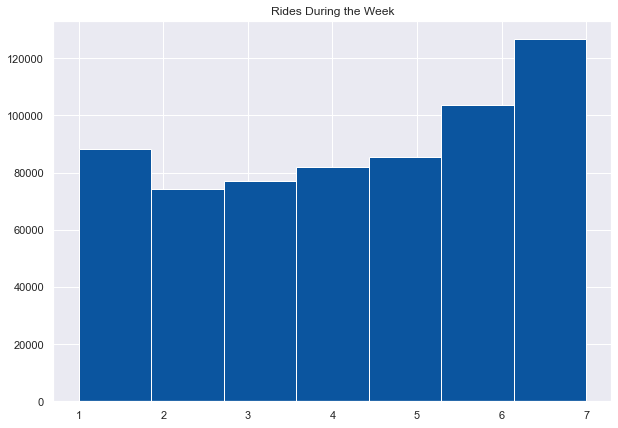

In [138]:
import seaborn as sns
sns.set(palette='Blues_r')
df123.loc[:,'DayOfWeek'].hist(bins=7, figsize=(10,7)).set_title('Rides During the Week')

In [139]:
# Remove any rows that started or ended out of bounds
df123a = df123a[~df123a['StartLatitude'].astype(str).str.contains('OUT_OF_BOUNDS')]
df123a = df123a[~df123a['EndLatitude'].astype(str).str.contains('OUT_OF_BOUNDS')]
df123a = df123a[~df123a['StartLongitude'].astype(str).str.contains('OUT_OF_BOUNDS')]
df123a = df123a[~df123a['EndLongitude'].astype(str).str.contains('OUT_OF_BOUNDS')]

# Get number of rows dropped
rows_remaining = df123a.shape[0]
oob_rows_dropped = rows_remaining - df123a.shape[0]
print('Out of Bounds entries dropped: ' + str(oob_rows_dropped))

Out of Bounds entries dropped: 0


Before removing outliers:


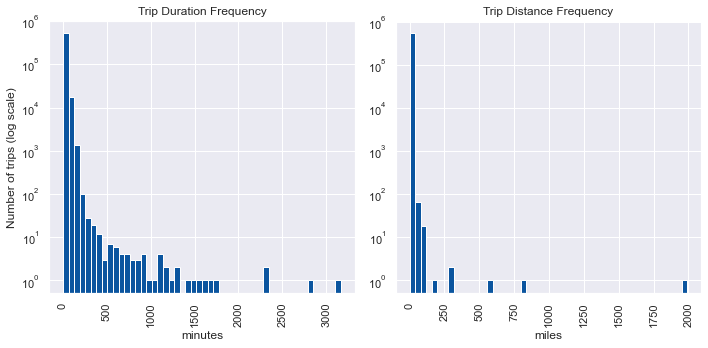

In [150]:
print('Before removing outliers:')

# Describe showed some negative and very high values for Trip Distance and Trip Duration.
# Use histograms to show how the values are distributed.

plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.hist(df123['TripDuration'], bins=50, log=True)
plt.ylabel('Number of trips (log scale)')
plt.xlabel('minutes')
plt.title('Trip Duration Frequency')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.hist(df123['TripDistance'], bins=50, log=True)
plt.xlabel('miles')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()
plt.close()


In [141]:
# Describe showed negative trip duration values. Remove these entries
df123 = df123[df123['TripDuration'] > 0]

# Get number of rows dropped
rows_remaining = df123.shape[0]
neg_dur_rows_dropped = rows_remaining - df123.shape[0]
print('Negative duration dropped: ' + str(neg_dur_rows_dropped))

# Drop > a certain number of hours
time_thresh = 720 #720 minutes (i.e. 12 hours)
rows_remaining = df123.shape[0]
df123 = df123[df123['TripDuration'] < time_thresh]
high_dur_rows_dropped = rows_remaining - df123.shape[0]

print('Over ' + str(time_thresh/60) + ' hours dropped: ' + str(high_dur_rows_dropped))

# Describe showed negative trip distance values. Remove these entries, and trips of 0 m.
rows_remaining = df123.shape[0]
df123 = df123[df123['TripDistance'] > 0]
neg_dist_rows_dropped = rows_remaining - df123.shape[0]
print('Negative or 0 distance dropped: ' + str(neg_dist_rows_dropped))

# Remove entries over a certain amount for trip distance.  Average scooter battery range is 30 mi, with some capable of 50 mi.
dist_thresh = 50 #no. of miles 
rows_remaining = df123.shape[0]
df123 = df123[df123['TripDistance'] < dist_thresh]
high_dist_rows_dropped = rows_remaining - df123.shape[0]
print('Distance > ' + str(dist_thresh) + ' mi dropped: ' + str(high_dist_rows_dropped))

Negative duration dropped: 0
Over 12.0 hours dropped: 0
Negative or 0 distance dropped: 0
Distance > 49.9999845312 mi dropped: 0


After removing outliers:


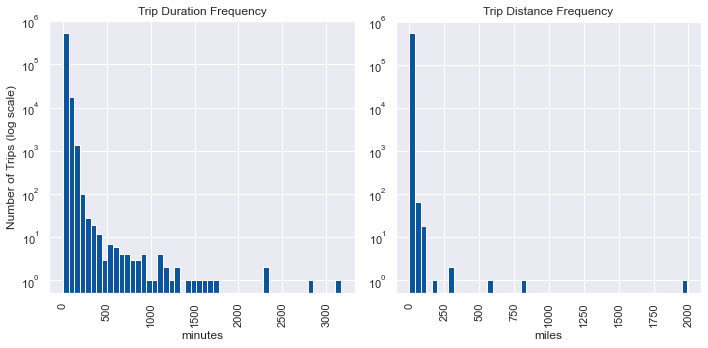

In [151]:
print('After removing outliers:')
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.hist(df123['TripDuration'], bins=50, log=True)
plt.ylabel('Number of Trips (log scale)')
plt.xlabel('minutes')
plt.title('Trip Duration Frequency')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.hist(df123['TripDistance'], bins=50, log=True)
plt.xlabel('miles')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()
plt.close()

In [170]:
df123[df123['TripDuration'] > 720].count()


TripID            32
StartDate         32
TripDuration      32
TripDistance      32
StartLatitude     32
StartLongitude    32
EndLatitude       32
EndLongitude      32
DayOfWeek         32
HourNum           32
Precip.(inch)     32
Snow(inch)        32
AvgTemp           32
dtype: int64